This notebook treats the parametrically-driven resonator in the presence of nonlinear damping and an external force
$$ 
\ddot{x} + \gamma \dot{x} + \omega_0^2 \left[ 1 - \lambda \cos(2 \omega t) \right]x + \alpha x^3 + \eta x^2 \dot{x} = F \cos(\omega t + \theta)
$$

for details, consult Papariello et al., Phys. Rev. E 94, 022201. 

The expected response results from a period-doubling bifurcation and oscillates at $\omega$. If $F=0$ it is doubly degenerate, as the system can show two distinct pi-shifted responses. $F\neq 0$ breaks this degeneracy.



In [1]:
using HarmonicBalance

┌ Info: Precompiling HarmonicBalance [e13b9ff6-59c3-11ec-14b1-f3d2cc6c135e]
└ @ Base loading.jl:1662


# Natural equation for the parametron

In [2]:
@variables ω0, γ, λ, F, x, θ, η, α, ω, t, x(t)

natural_equation =  d(d(x,t),t) + γ*d(x,t) + ω0^2*(1-λ*cos(2*ω*t))*x + α*x^3 + η*d(x,t)*x^2 ~ F*cos(ω*t+θ)
dEOM = DifferentialEquation(natural_equation, x)
add_harmonic!(dEOM, x, ω);
harm_eq = get_harmonic_equations(dEOM)

fixed = (ω0 => 1.0, γ => 1E-2, λ => 5E-2, F => 1E-3, α => 1., η=>0.3, θ => 0);

## 1D parameter set: results, phase diagram

Tracking 9 paths... 100%|███████████████████████████████| Time: 0:00:15
  # paths tracked:                  9
  # non-singular solutions (real):  5 (0)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         5 (0)


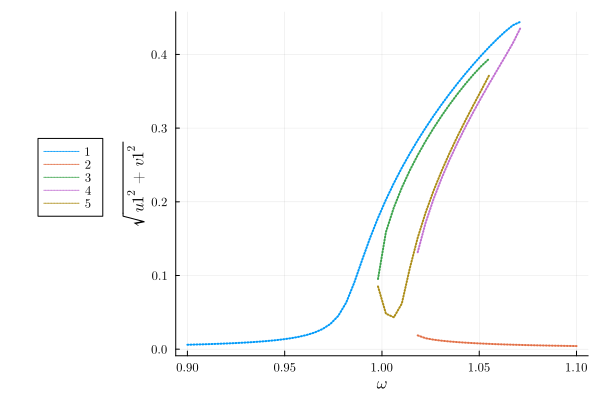

In [3]:
varied = ω => LinRange(0.9, 1.1, 50)
result_1D = get_steady_states(harm_eq, varied, fixed);

# plot stable, add unstable as dotted
p = plot(result_1D, "sqrt(u1^2 + v1^+2)", class="stable")
plot!(result_1D, "sqrt(u1^2 + v1^+2)", not_class="stable", style=:dot)

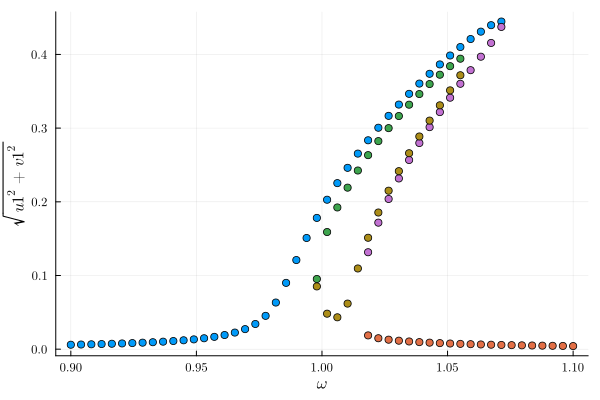

In [4]:
# show point markers instead
plot(result_1D, "sqrt(u1^2 + v1^+2)", markers=:true, line=false, legend=false)

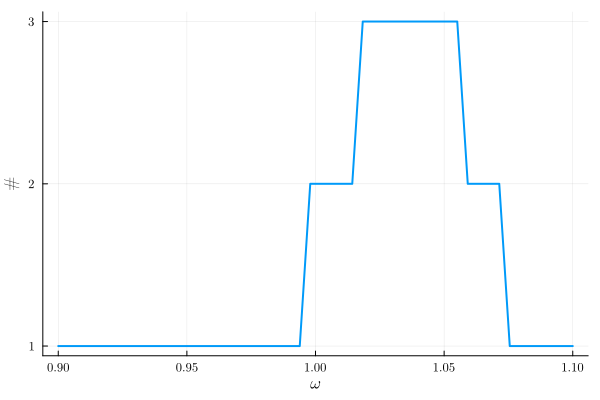

In [5]:
plot_phase_diagram(result_1D, "stable")

## 2D parameter set

Solving for 2500 parameters... 100%|████████████████████| Time: 0:00:01
  # parameters solved:  2500
  # paths tracked:      12500


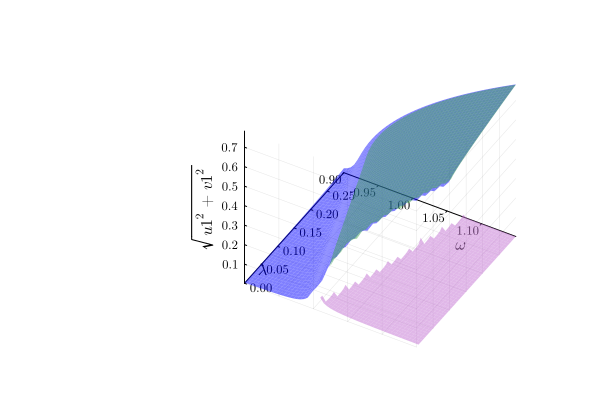

In [6]:
varied = (ω => LinRange(0.9, 1.15,50), λ => LinRange(0.0, 0.3, 50))
result_2D = get_steady_states(harm_eq, varied, fixed, sorting="none");

# add the 5 branches with different colors
p=plot(result_2D, "sqrt(u1^2 + v1^2)", branch=1, class="stable", camera=(60,-40))
[plot!(result_2D, "sqrt(u1^2 + v1^2)", branch=k, class="stable", c=k) for k in 2:5]
p

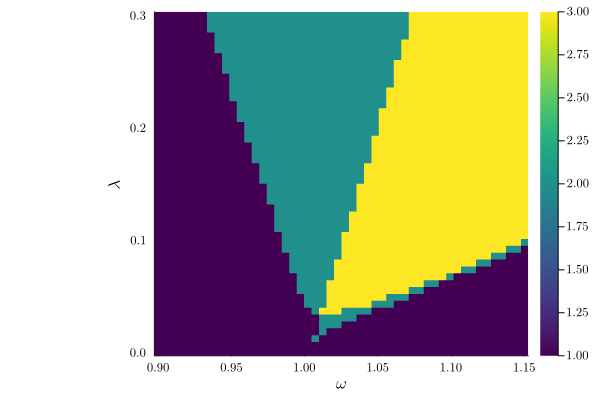

In [7]:
plot_phase_diagram(result_2D, class="stable")

# Time-dependent solving

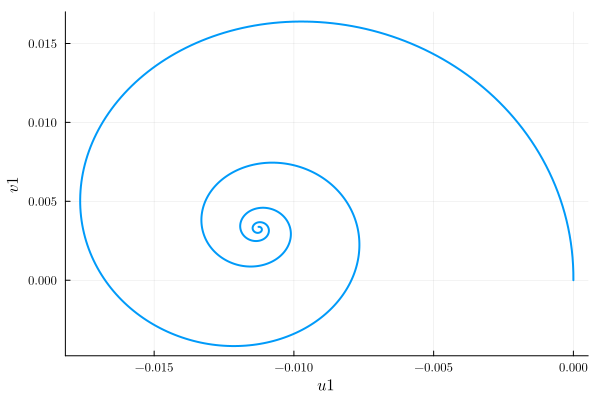

In [8]:
import HarmonicBalance.TimeEvolution: ODEProblem, DifferentialEquations.solve

x0 = [0.0, 0.0]

fixed = (ω0 => 1.0,γ => 1E-2, λ => 5E-2, F => 1E-3,  α => 1., η=>0.3, θ => 0,  ω=>1.03)
ode_problem = ODEProblem(harm_eq, fixed, x0 = x0, timespan = (0,1000));
time_evo= solve(ode_problem, saveat=1.); # saveat fixes output resolution (NOT the integration timestep)
HarmonicBalance.plot(time_evo, ["u1", "v1"], harm_eq)

# Linear response spectra: WIP

  5.503446 seconds (11.54 M allocations: 1.521 GiB, 6.37% gc time, 98.93% compilation time)


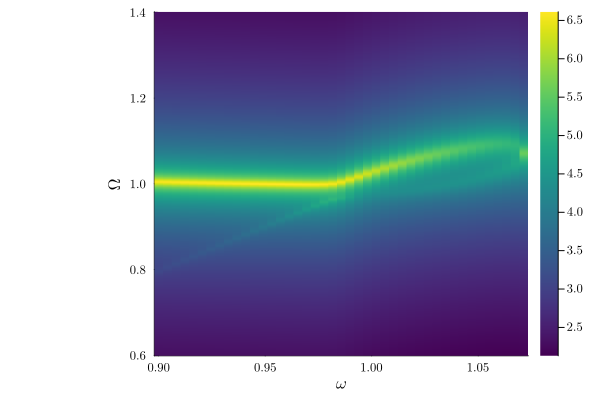

In [9]:
@time spectrum = HarmonicBalance.LinearResponse.plot_linear_response(result_1D, x, branch=1, 
    Ω_range=LinRange(0.6,1.4,300), order=1, logscale=true)

In [10]:
#@time spectrum = HarmonicBalance.LinearResponse.plot_linear_response(soln, x, branch=1, 
#    Ω_range=LinRange(0.6,1.4,300), order=2, logscale=true)
# @time HarmonicBalance.LinearResponse.plot_response(soln, LinRange(0.7,1.3,1000), branch=1, logscale=false);